In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [47]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [48]:
ls data


signnames.csv  test.p  train.p


In [0]:
train = pd.read_pickle('data/train.p')

In [50]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [51]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [52]:
# 32 x 32 pixele, 3 kanały rgb
# RGB - Red Green Blue
# RGB przyjmuje 256 wartości - od 0 do 255
X_train[0]

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

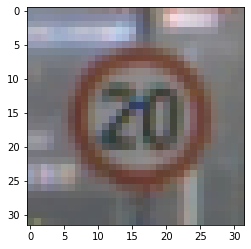

In [53]:
plt.imshow(X_train[10000])

In [54]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [55]:
dict_signs = signs.to_dict()['b']
dict_signs

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [56]:
# sprawdzamy ile jest znaków o danej nazewie (typie)
# jest tyle znaków ile zwróci o id podanym w y_train
X_train [ y_train == 42 ].shape

(210, 32, 32, 3)

In [57]:
for id_sign in dict_signs.keys():
  given_signs = X_train[ y_train == id_sign ]
  
  plt.figure(figsize=( 15,5  ))
  for i in range (9):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow( given_signs[i] )
    plt.axis('off')

plt.tight_layout()
plt.show()    

Output hidden; open in https://colab.research.google.com to view.

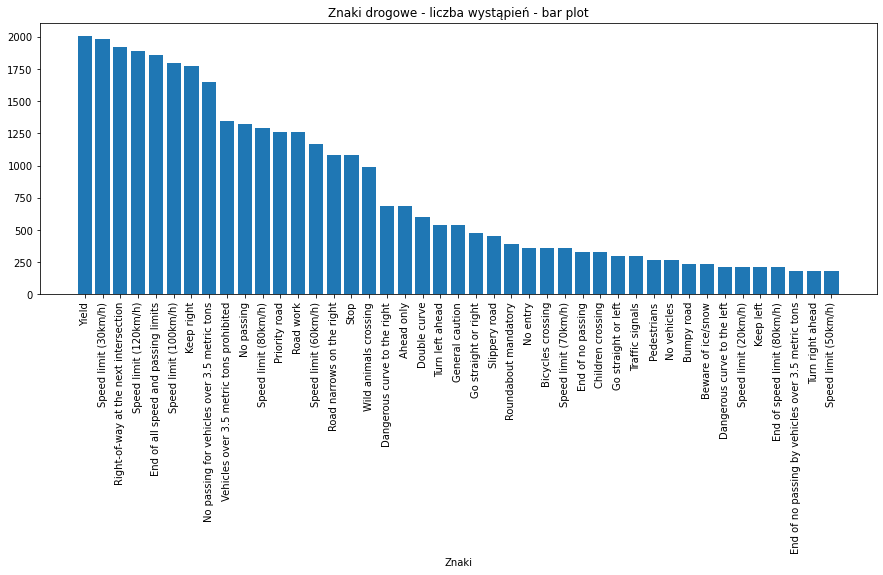

In [60]:
 cnt = Counter(y_train).most_common()
 # rozbijamy na dwie listy, pierwsza to id znaków a druga liczby wystąpień
 id_labels, cnt_labels = zip(*cnt)
id_labels, cnt_labels
ids = range(len(id_labels))

plt.figure(figsize=(15,5))
plt.bar(ids, cnt_labels)

plt.xlabel('Znaki')
labels = [dict_signs[ id_labels[id_] ] for id_ in id_labels]
plt.xticks(ids, labels, rotation='vertical')
plt.title('Znaki drogowe - liczba wystąpień - bar plot')

plt.show()